In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/global-temperature-records-1850-2022/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')

# Display the first few rows of the dataset
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display information about missing values
print("Missing Values:")
print(missing_values)

# Drop rows with missing values
df_cleaned = df.dropna()

# Display the shape of the cleaned dataset
print("\nShape of Cleaned Dataset:", df_cleaned.shape)


Missing Values:
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

Shape of Cleaned Dataset: (228175, 7)


**How can we explore the distribution of average temperatures globally over the entire time period?**

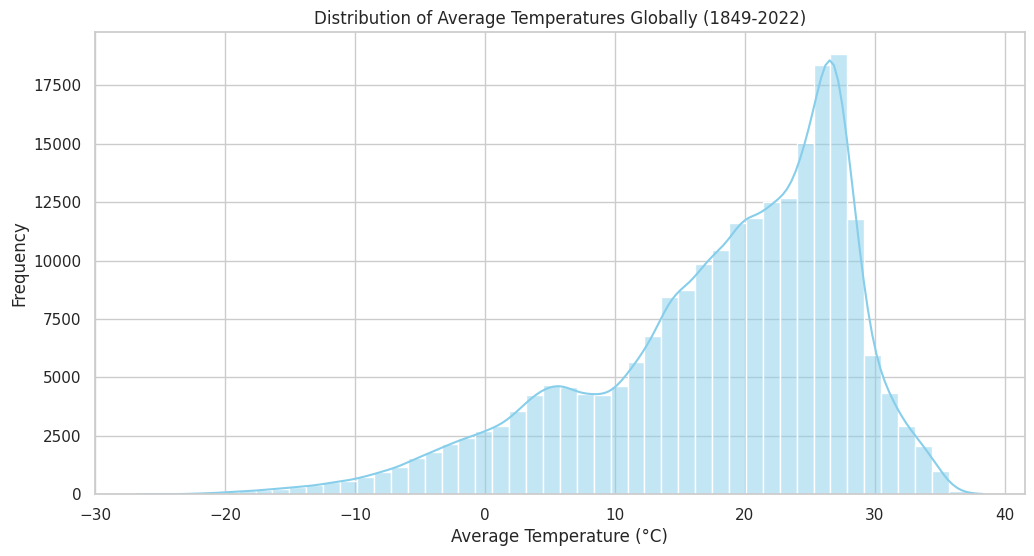

In [3]:
# Import necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of average temperatures globally
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['AverageTemperature'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Average Temperatures Globally (1849-2022)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


**How can we analyze the relationship between average temperature and its uncertainty?**

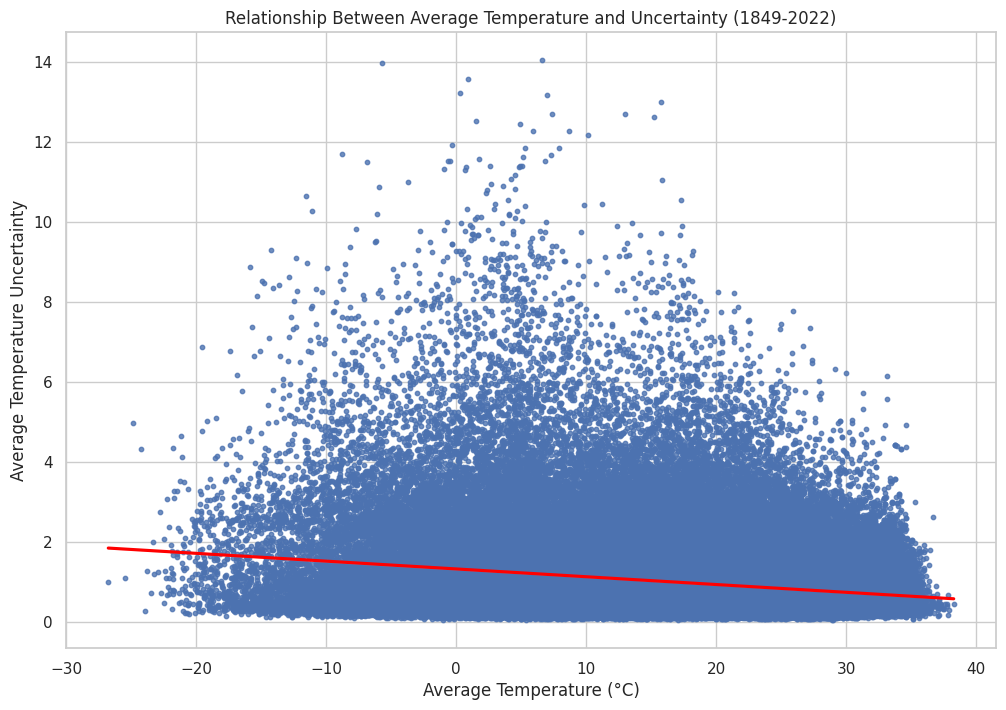

In [4]:
# Plot a scatter plot with a regression line to analyze the relationship
plt.figure(figsize=(12, 8))
sns.regplot(x='AverageTemperature', y='AverageTemperatureUncertainty', data=df_cleaned, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship Between Average Temperature and Uncertainty (1849-2022)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Temperature Uncertainty')
plt.show()


**How can we identify the top N cities with the highest average temperatures in the dataset?**

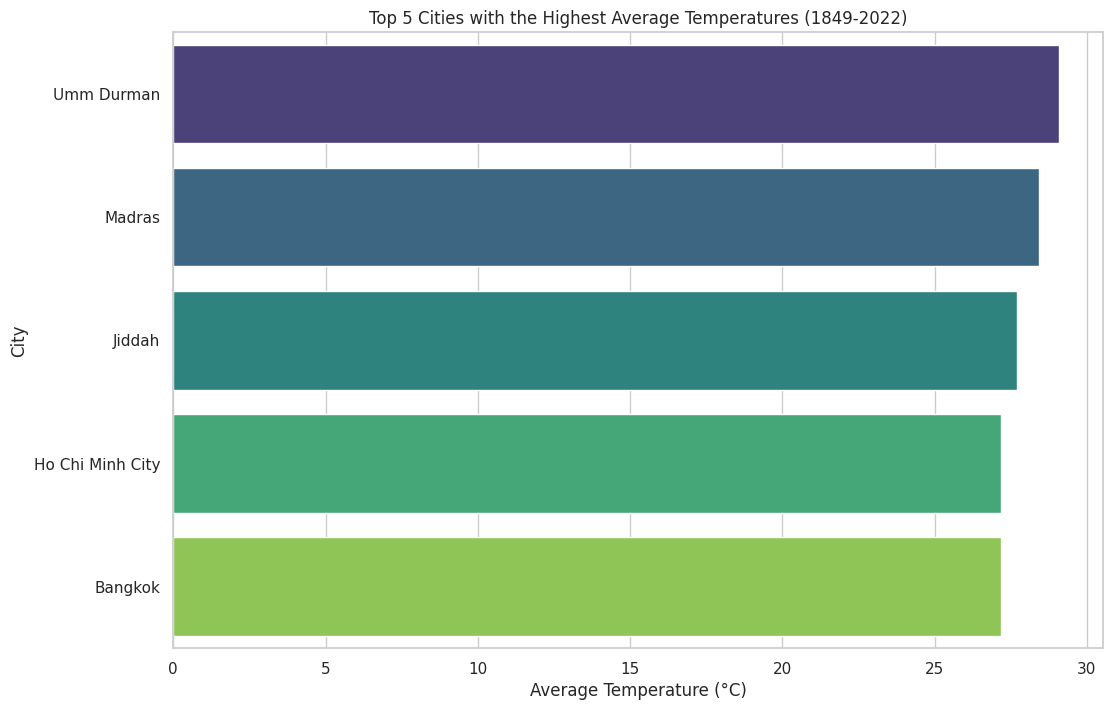

In [5]:
# Specify the number of top cities to identify (replace N with the desired number)
top_n = 5

# Group the data by city and calculate the mean of average temperatures
city_avg_temp = df_cleaned.groupby('City')['AverageTemperature'].mean().reset_index()

# Sort the cities based on average temperature in descending order
top_cities = city_avg_temp.sort_values(by='AverageTemperature', ascending=False).head(top_n)

# Plot the top N cities with the highest average temperatures
plt.figure(figsize=(12, 8))
sns.barplot(x='AverageTemperature', y='City', data=top_cities, palette='viridis')
plt.title(f'Top {top_n} Cities with the Highest Average Temperatures (1849-2022)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('City')
plt.show()


**Visualize the distribution of average temperatures**

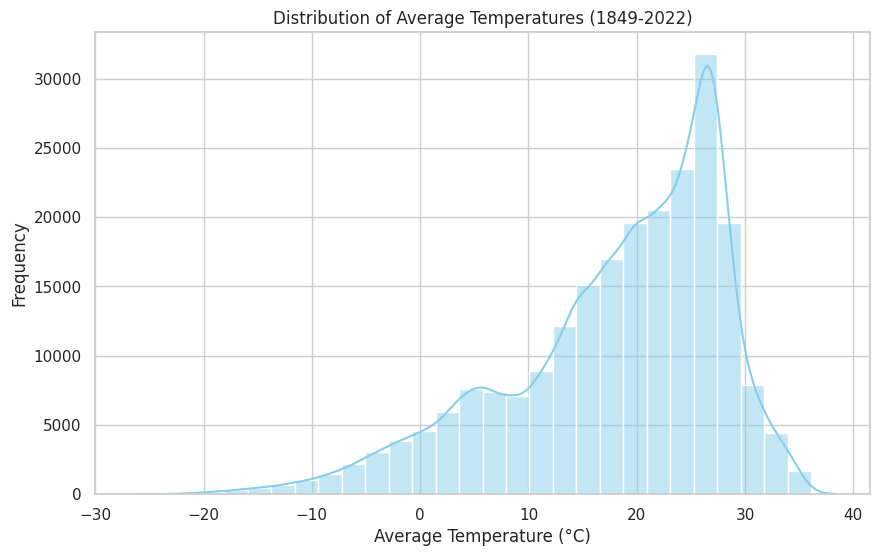

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['AverageTemperature'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Temperatures (1849-2022)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

**How can we explore the correlation between average temperatures and their uncertainties?**

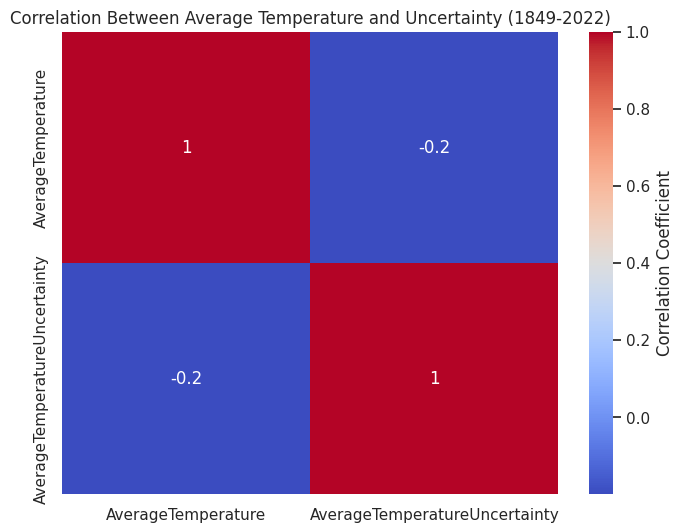

In [7]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[['AverageTemperature', 'AverageTemperatureUncertainty']].corr()

# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Between Average Temperature and Uncertainty (1849-2022)')
plt.show()


**How can we visualize the distribution of average temperatures across different countries?**

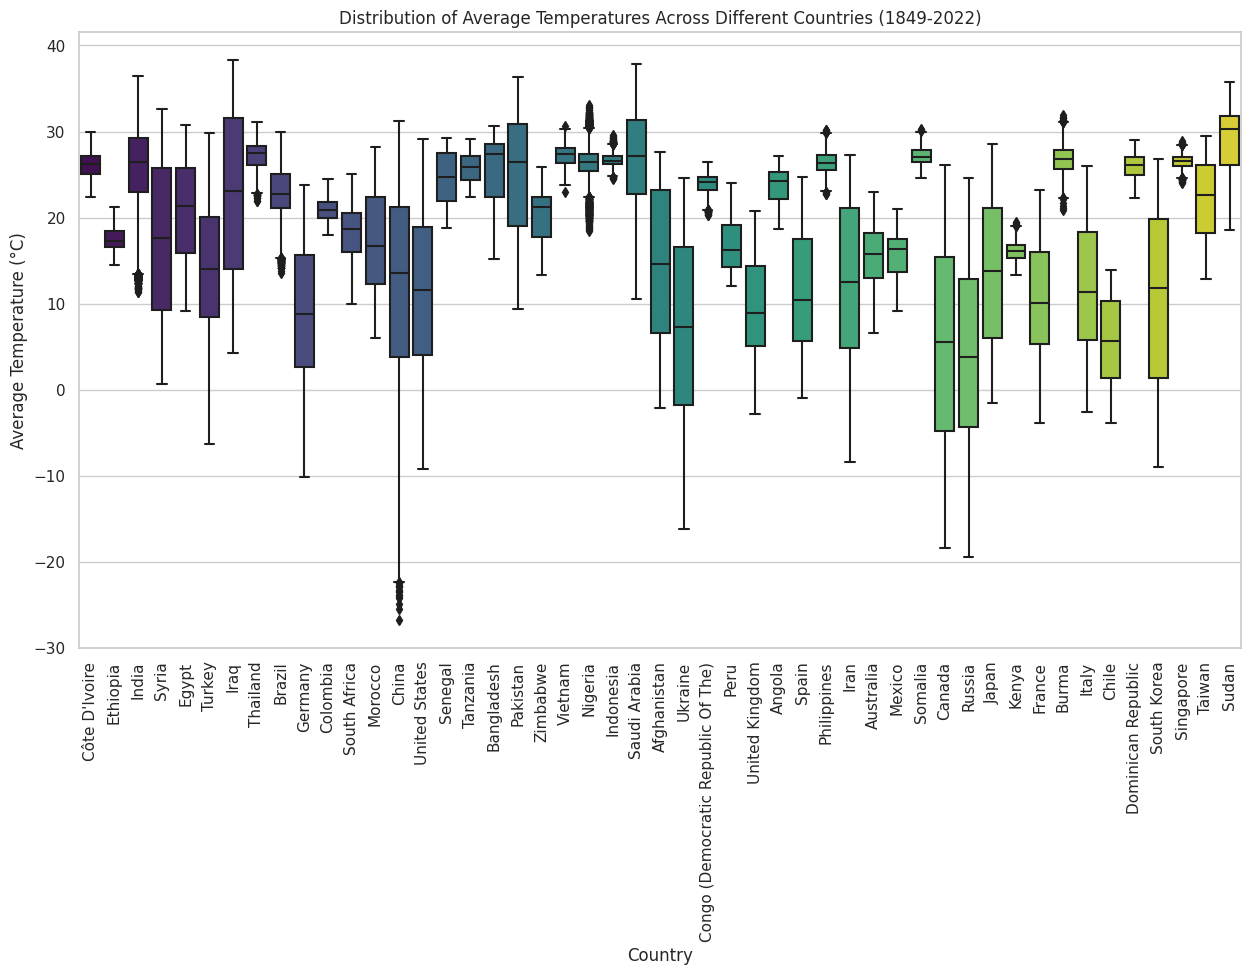

In [8]:
# Visualize the distribution of average temperatures for each country
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='AverageTemperature', data=df_cleaned, palette='viridis')
plt.title('Distribution of Average Temperatures Across Different Countries (1849-2022)')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


**How can we analyze the temporal trends in global average temperatures?**

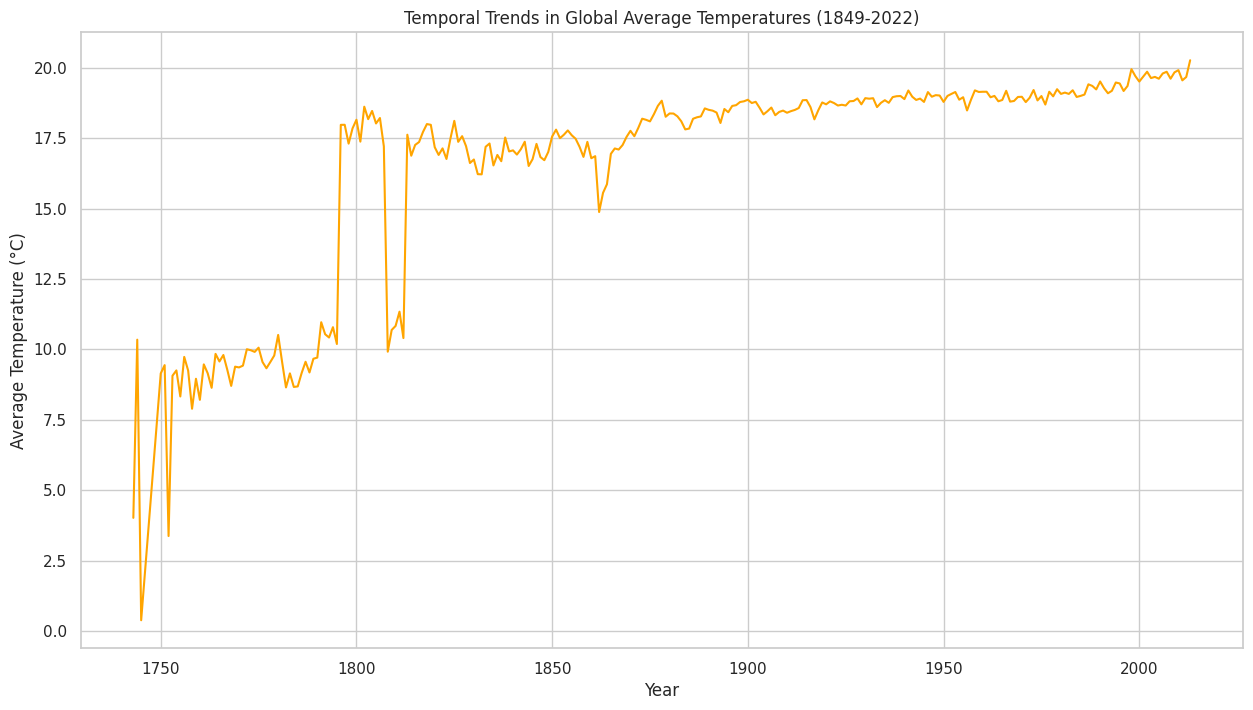

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Ensure 'dt' column is in datetime format
df_cleaned['dt'] = pd.to_datetime(df_cleaned['dt'])

# Extract year and month from the 'dt' column
df_cleaned['Year'] = df_cleaned['dt'].dt.year
df_cleaned['Month'] = df_cleaned['dt'].dt.month

# Make a copy of the DataFrame to avoid the SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Group the data by year and calculate the mean average temperature
annual_mean_temp = df_cleaned.groupby('Year')['AverageTemperature'].mean().reset_index()

# Visualize the temporal trends in global average temperatures
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='AverageTemperature', data=annual_mean_temp, color='orange')
plt.title('Temporal Trends in Global Average Temperatures (1849-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()


**How can we analyze the distribution of average temperatures across different months?**

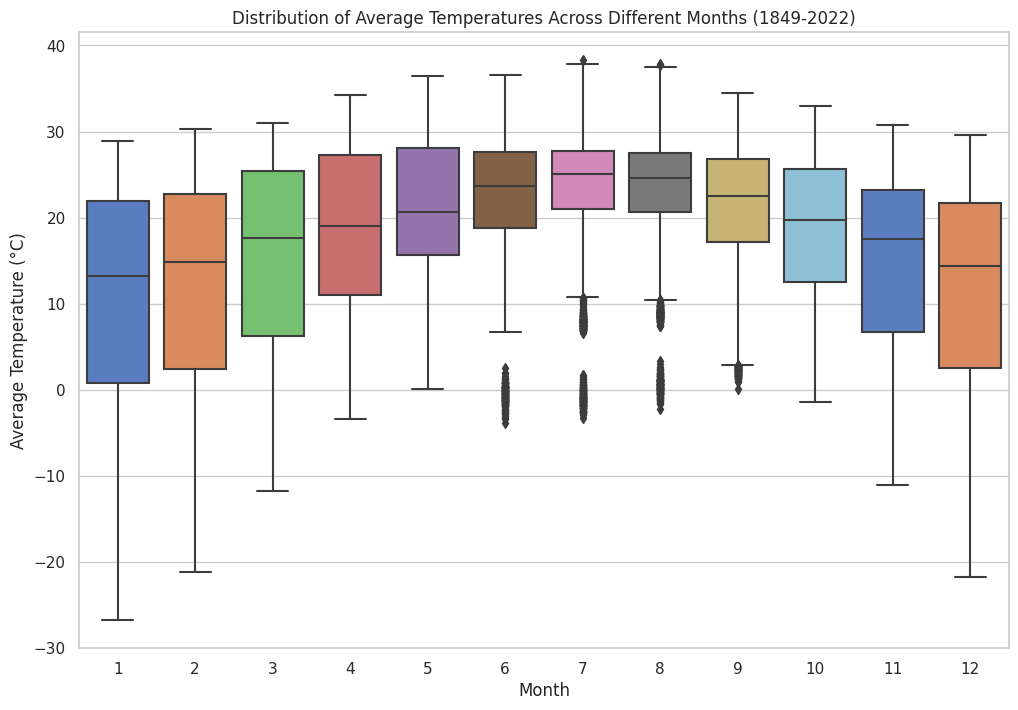

In [10]:
# Extract month from the 'dt' column
df_cleaned['Month'] = df_cleaned['dt'].dt.month

# Visualize the distribution of average temperatures for each month
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='AverageTemperature', data=df_cleaned, palette='muted')
plt.title('Distribution of Average Temperatures Across Different Months (1849-2022)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()


**How can we analyze the trend of average temperature uncertainty over the years?**

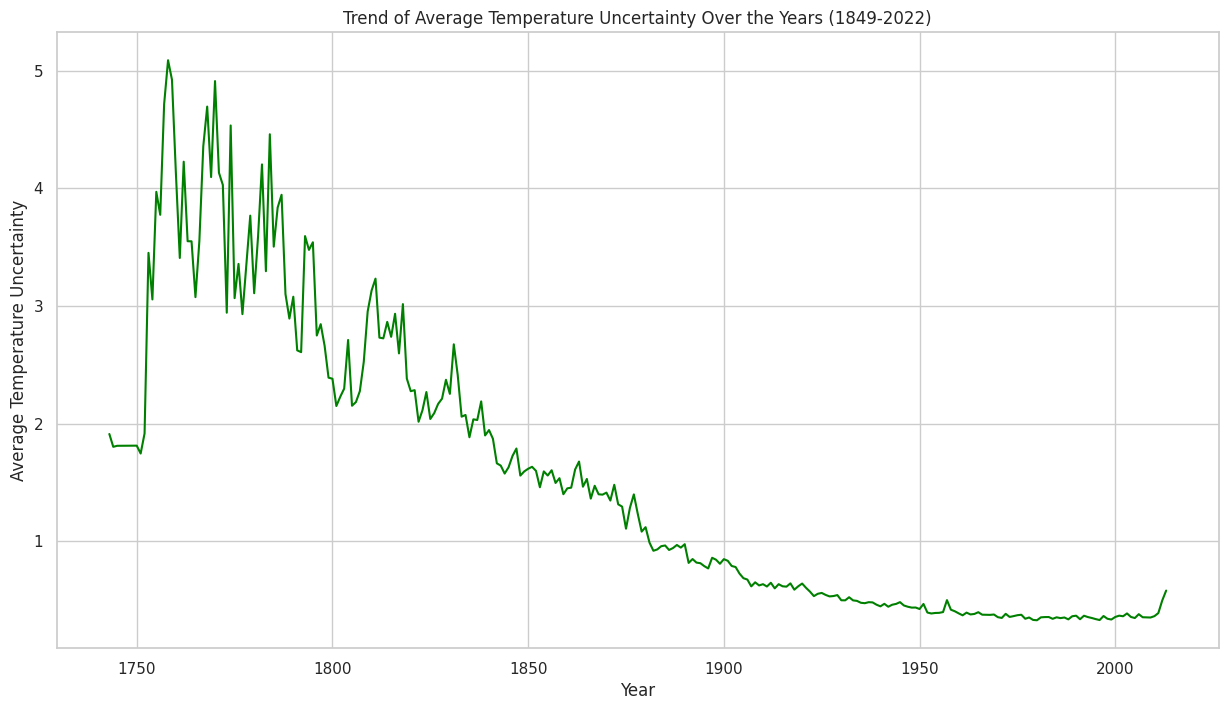

In [11]:
# Group the data by year and calculate the mean temperature uncertainty
annual_mean_uncertainty = df_cleaned.groupby('Year')['AverageTemperatureUncertainty'].mean().reset_index()

# Visualize the trend of average temperature uncertainty over the years
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='AverageTemperatureUncertainty', data=annual_mean_uncertainty, color='green')
plt.title('Trend of Average Temperature Uncertainty Over the Years (1849-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature Uncertainty')
plt.show()


**How can we compare the average temperatures between Northern and Southern Hemisphere cities?**

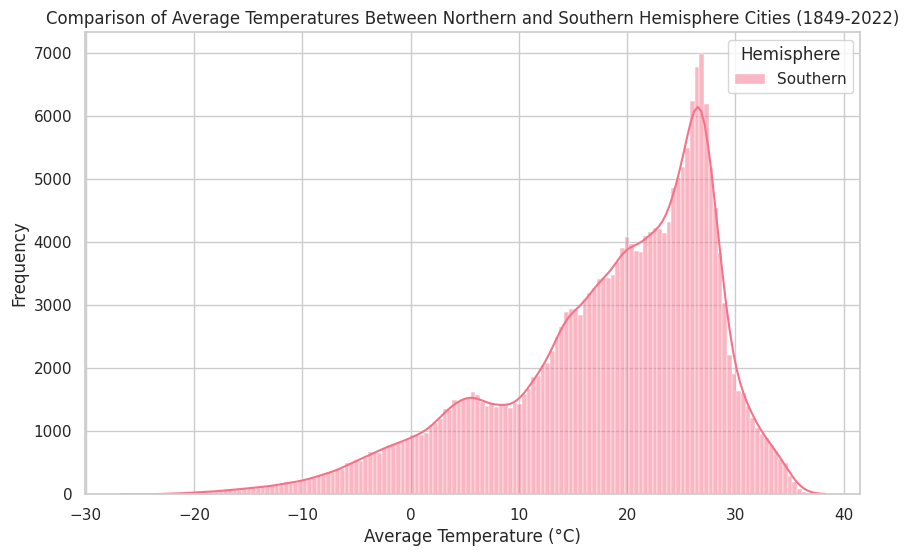

In [12]:
import numpy as np

# Convert 'Latitude' to numeric data type
df_cleaned['Latitude'] = pd.to_numeric(df_cleaned['Latitude'], errors='coerce')

# Categorize cities into Northern and Southern Hemispheres based on latitude
df_cleaned['Hemisphere'] = np.where(df_cleaned['Latitude'] >= 0, 'Northern', 'Southern')

# Visualize the comparison of average temperatures between Northern and Southern Hemisphere cities
plt.figure(figsize=(10, 6))
sns.histplot(x='AverageTemperature', hue='Hemisphere', data=df_cleaned, kde=True, palette='husl', multiple='stack')
plt.title('Comparison of Average Temperatures Between Northern and Southern Hemisphere Cities (1849-2022)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


**How can we visualize the spread of average temperatures for different months?**

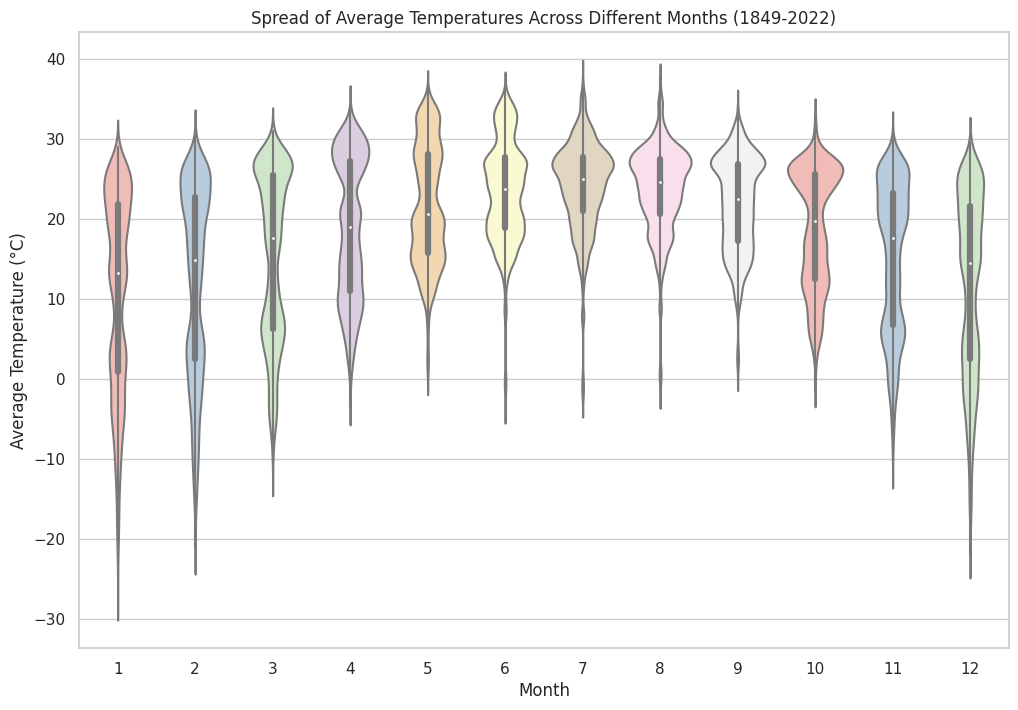

In [13]:
# Visualize the spread of average temperatures for each month
plt.figure(figsize=(12, 8))
sns.violinplot(x='Month', y='AverageTemperature', data=df_cleaned, palette='Pastel1')
plt.title('Spread of Average Temperatures Across Different Months (1849-2022)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()


**How can we explore the distribution of average temperatures for each country through a strip plot?**

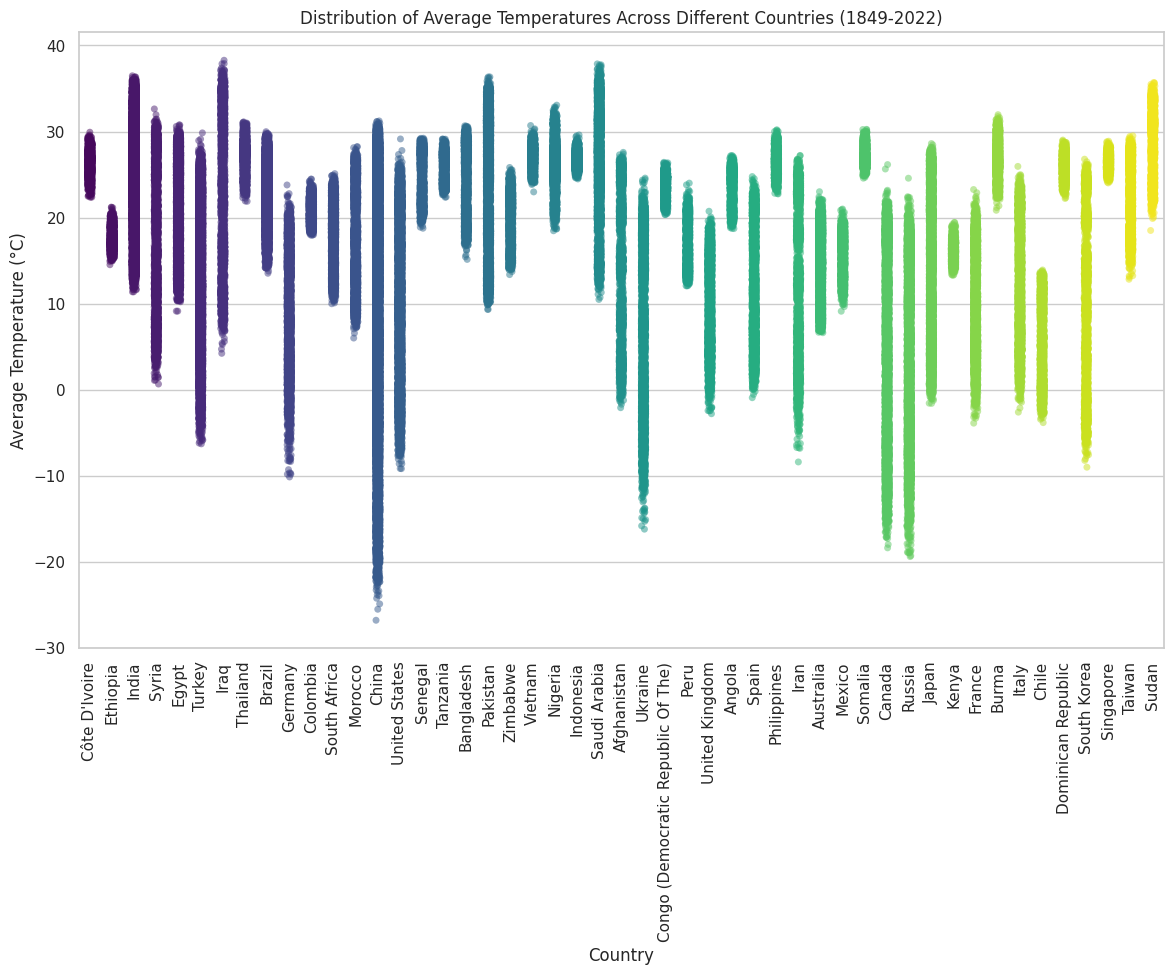

In [14]:
# Visualize the distribution of average temperatures for each country using a strip plot
plt.figure(figsize=(14, 8))
sns.stripplot(x='Country', y='AverageTemperature', data=df_cleaned, palette='viridis', alpha=0.5)
plt.title('Distribution of Average Temperatures Across Different Countries (1849-2022)')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


**How can we compare the average temperatures of different countries using a bar plot?**

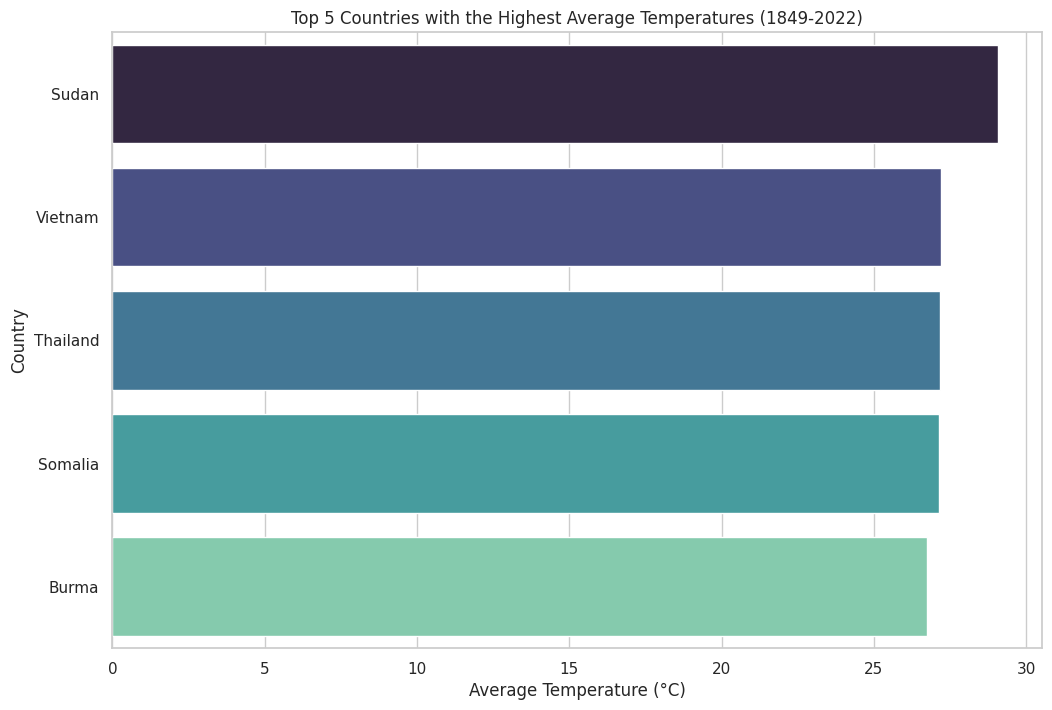

In [15]:
# Specify the number of top countries to compare (replace N with the desired number)
top_n_countries = 5

# Group the data by country and calculate the mean of average temperatures
country_avg_temp = df_cleaned.groupby('Country')['AverageTemperature'].mean().reset_index()

# Sort the countries based on average temperature in descending order
top_countries = country_avg_temp.sort_values(by='AverageTemperature', ascending=False).head(top_n_countries)

# Plot the average temperatures of the top N countries
plt.figure(figsize=(12, 8))
sns.barplot(x='AverageTemperature', y='Country', data=top_countries, palette='mako')
plt.title(f'Top {top_n_countries} Countries with the Highest Average Temperatures (1849-2022)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.show()


**Can you provide a code snippet to visualize the distribution of average temperatures across all cities using a kernel density estimate (KDE) plot?**

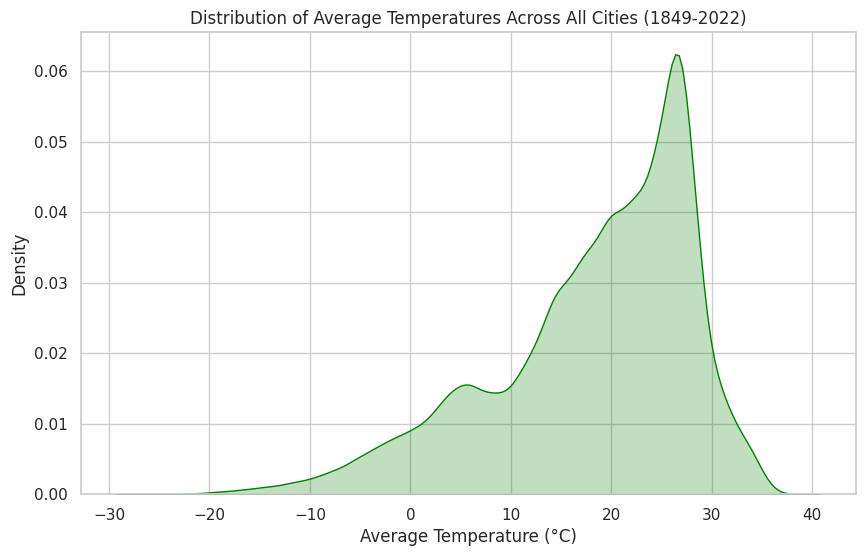

In [16]:
# Visualize the distribution of average temperatures using KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['AverageTemperature'], fill=True, color='green')
plt.title('Distribution of Average Temperatures Across All Cities (1849-2022)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Density')
plt.show()
